# HeartDisease

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [31]:
font_path = 'C:\\Windows\\Fonts\\HANYGO230.ttf' # 윈도우 OS 폰트 경로
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name() # 폰트명
plt.rc('font', family=font_name)
# matplotlib이 기본적으로 사용하는 유니코드 마이너스 비활성화
# -> 아스키코드의 마이너스 사용
plt.rc('axes', unicode_minus=False)

## 1. 데이터 가져오기

In [22]:
df = pd.read_csv('data/heart_2022_with_nans.csv')
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ago),No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ago),Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ago),Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ago),Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No


## 2. 데이터 구조 및 변수 이해

In [23]:
pd.set_option('display.max_columns', None)   # 컬럼 생략 없이 전체 표시
pd.set_option('display.max_rows', None)      # 필요한 경우 행도 생략 없이 표시
pd.set_option('display.width', None)   
df.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## 03. 데이터 요약 및 기술 통계

In [24]:
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


In [25]:
pd.set_option('display.max_columns', None)   # 컬럼 생략 없이 전부 출력
pd.set_option('display.max_rows', None)      # 행 생략 없이 출력 (필요하면)
pd.set_option('display.width', None)         # 가로줄 자동 줄바꿈 방지
pd.set_option('display.max_colwidth', None)
df.describe(include='object')

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,445132,445132,443934,436824,444039,433772,442067,440727,443575,443359,441989,442913,442320,443206,442499,444045,424485,423568,420892,421120,421217,419476,409670,409472,389086,431075,436053,398558,379005,398011,368092,362616,394509,394368
unique,54,2,5,4,2,4,2,2,2,2,2,2,2,2,2,4,2,2,2,2,2,2,4,4,2,5,13,2,2,2,2,4,2,3
top,Washington,Female,Very good,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 65 to 69,Yes,No,Yes,No,"No, did not receive any tetanus shot in the past 10 years",No,No
freq,26152,235893,148444,350944,337559,233455,416959,414176,424336,376665,406504,407257,350910,422891,291351,368722,385539,399910,370792,353039,404404,387029,245955,311988,223221,320421,47099,210891,249919,209256,215604,121493,377324,270055


In [26]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

## 3. 데이터 결측치 이상치

In [27]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

<Axes: >

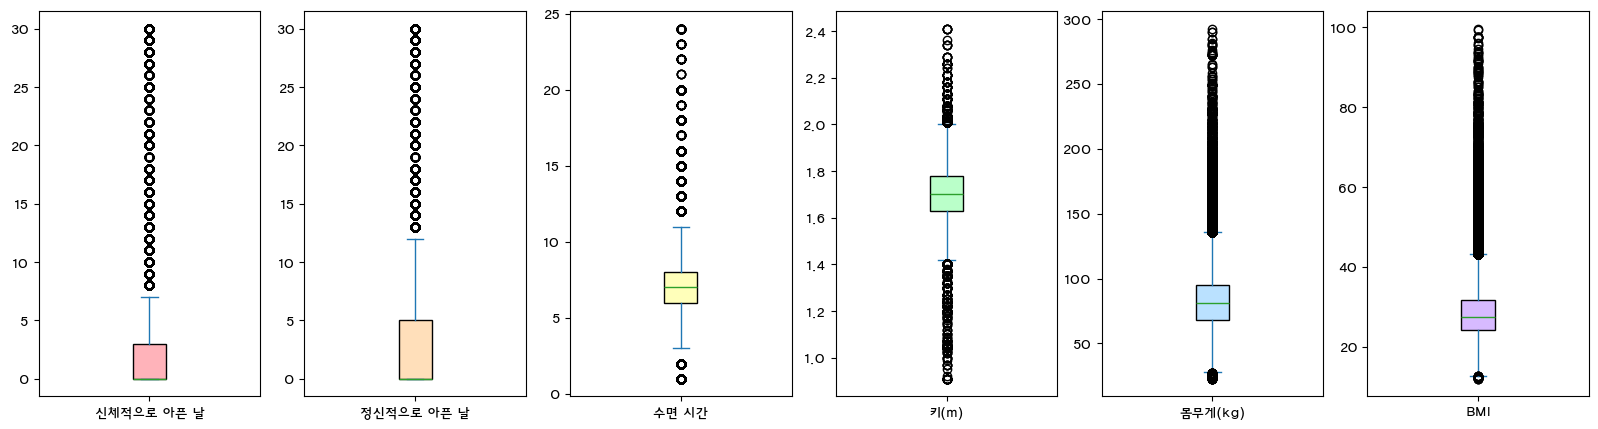

In [32]:
fig, ax = plt.subplots(1, 6, figsize=(20,5))
df['PhysicalHealthDays'].rename('신체적으로 아픈 날').plot(kind='box', ax=ax[0],  patch_artist=True, boxprops=dict(facecolor='#FFB3BA'))
df['MentalHealthDays'].rename('정신적으로 아픈 날').plot(kind='box', ax=ax[1],  patch_artist=True, boxprops=dict(facecolor='#FFDFBA'))
df['SleepHours'].rename('수면 시간').plot(kind='box', ax=ax[2],  patch_artist=True, boxprops=dict(facecolor='#FFFFBA'))
df['HeightInMeters'].rename('키(m)').plot(kind='box', ax=ax[3],  patch_artist=True, boxprops=dict(facecolor='#BAFFC9'))
df['WeightInKilograms'].rename('몸무게(kg)').plot(kind='box', ax=ax[4],  patch_artist=True, boxprops=dict(facecolor='#BAE1FF'))
df['BMI'].plot(kind='box', ax=ax[5],  patch_artist=True, boxprops=dict(facecolor='#D7BAFF'))

## 4. 데이터 전처리

### 결측치 제거

In [ ]:
# 결측치 행 전부 삭제
df = df.dropna().reset_index()


### 이상치

In [ ]:
# 수면시간 이상치
q1 = df['SleepHours'].quantile(0.25)
q3 = df['SleepHours'].quantile(0.75)

iqr = q3 - q1

low = q1 - iqr * 1.5
high = q3 + iqr * 1.5
high

# 하한 이상치는 최소값 / 상한 이상치는 최대값으로 변경
df['SleepHours'] = df['SleepHours'].clip(lower=low, upper=high)

In [ ]:
# 심근경색 / 협심증 여부를 심장 질환 컬럼하나로 통합
df['HeartDisease'] = (df['HadHeartAttack'] == 'Yes') | (df['HadAngina'] == 'Yes')
df['HeartDisease'] = df['HeartDisease'].map({True: 'Yes', False: 'No'})
df['HeartDisease_num'] = df['HeartDisease'].map({'Yes':1, 'No':0})


# 흡연 여부
df['SmokerStatus'] = df['SmokerStatus'].replace({
    'Never smoked': '비흡연',
    'Former smoker': '과거흡연',
    'Current smoker - now smokes some days': '가끔흡연',
    'Current smoker - now smokes every day': '매일흡연'
})

# 전자 담배
df.loc[:,'ECigaretteUsage'] = df['ECigaretteUsage'].replace({
    'Never used e-cigarettes in my entire life': '비흡연',
    'Not at all (right now)': '과거흡연',
    'Use them some days': '가끔흡연',
    'Use them every day': '매일흡연'
})


df['bmi_group'] = pd.cut(df['BMI'], bins = [0, 18.5, 25, 30, 35, df['BMI'].max()], labels = ['저체중', '정상체중', '과체중', '비만', '고도비만'])

## 5.